In [120]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
# Load the dataset
file_path = 'deliveries.csv'  # Update the path if necessary
df = pd.read_csv(file_path)


In [122]:
# Display the first few rows to understand the data
print(df.head())

   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0

In [123]:
# Check the dataset structure
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [124]:
# Calculate statistics for batsman runs
runs_mean = df['batsman_runs'].mean()
runs_median = df['batsman_runs'].median()
runs_mode = df['batsman_runs'].mode().iloc[0]  # Mode may have multiple values; take the first

In [125]:
# Print results
print(f"Mean of Runs: {runs_mean}")
print(f"Median of Runs: {runs_median}")
print(f"Mode of Runs: {runs_mode}")


Mean of Runs: 1.265000766518473
Median of Runs: 1.0
Mode of Runs: 0


In [126]:
# Calculate statistics for wickets
wickets_mean = df['is_wicket'].mean()
wickets_median = df['is_wicket'].median()
wickets_mode = df['is_wicket'].mode().iloc[0]  # Mode may have multiple values; take the first

In [127]:
# Print results
print(f"Mean of Wickets: {wickets_mean}")
print(f"Median of Wickets: {wickets_median}")
print(f"Mode of Wickets: {wickets_mode}")


Mean of Wickets: 0.049632071132914304
Median of Wickets: 0.0
Mode of Wickets: 0


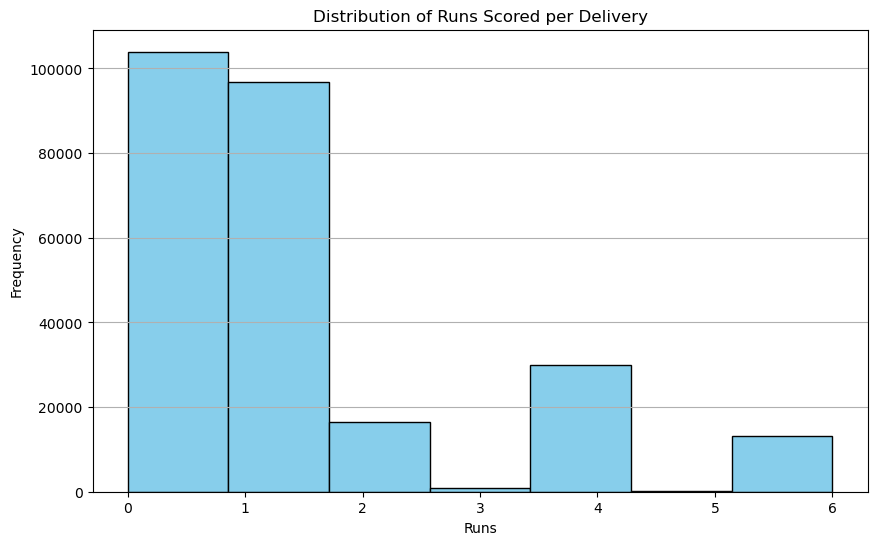

In [128]:
# Plot a histogram for runs
plt.figure(figsize=(10, 6))
plt.hist(df['batsman_runs'], bins=7, color='skyblue', edgecolor='black')
plt.title('Distribution of Runs Scored per Delivery')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


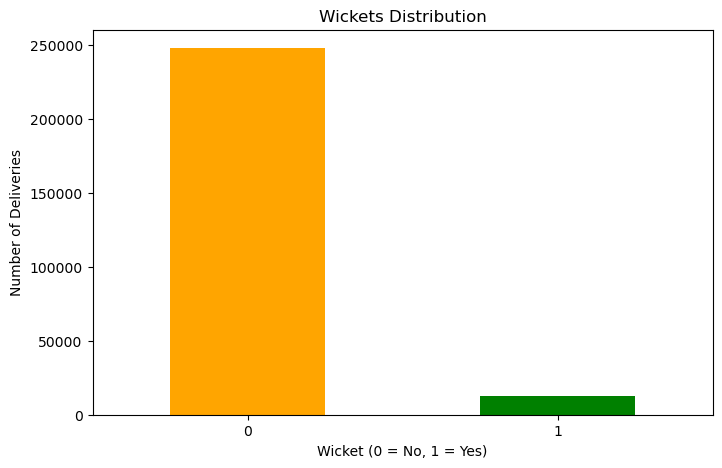

In [129]:
# Bar chart for wickets (count of deliveries with and without wickets)
wickets_count = df['is_wicket'].value_counts()

plt.figure(figsize=(8, 5))
wickets_count.plot(kind='bar', color=['orange', 'green'])
plt.title('Wickets Distribution')
plt.xlabel('Wicket (0 = No, 1 = Yes)')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=0)
plt.show()


In [130]:
# Group data by batsman
batsman_stats = df.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count'),
    dismissals=('player_dismissed', 'count'),
    hundreds=('batsman_runs', lambda x: (x >= 100).sum()),
    fifties=('batsman_runs', lambda x: ((x >= 50) & (x < 100)).sum())
).reset_index()

In [131]:
# Compute batting average and strike rate
batsman_stats['batting_average'] = batsman_stats['total_runs'] / batsman_stats['dismissals']
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100

In [132]:
# Fill NaN averages (for players with no dismissals) with their total runs
batsman_stats['batting_average'] = batsman_stats['batting_average'].fillna(batsman_stats['total_runs'])

In [133]:
# Display the first few rows
print(batsman_stats.head())

           batter  total_runs  balls_faced  dismissals  hundreds  fifties  \
0  A Ashish Reddy         280          196          15         0        0   
1        A Badoni         634          505          26         0        0   
2      A Chandila           4            7           1         0        0   
3        A Chopra          53           75           5         0        0   
4     A Choudhary          25           20           2         0        0   

   batting_average  strike_rate  
0        18.666667   142.857143  
1        24.384615   125.544554  
2         4.000000    57.142857  
3        10.600000    70.666667  
4        12.500000   125.000000  


In [134]:
# Normalize metrics
batsman_stats['normalized_average'] = (batsman_stats['batting_average'] / batsman_stats['batting_average'].max()) * 100
batsman_stats['normalized_strike_rate'] = (batsman_stats['strike_rate'] / batsman_stats['strike_rate'].max()) * 100

In [135]:
batsman_stats['normalized_hundreds'] = (
    (batsman_stats['hundreds'] / batsman_stats['hundreds'].max()) * 100
    if batsman_stats['hundreds'].max() > 0 else 0
)
batsman_stats['normalized_fifties'] = (
    (batsman_stats['fifties'] / batsman_stats['fifties'].max()) * 100
    if batsman_stats['fifties'].max() > 0 else 0
)


In [136]:
# Assign weights
weights = {
    'average': 0.3,
    'strike_rate': 0.4,
    'hundreds': 0.15,
    'fifties': 0.05
}

In [137]:
# Calculate overall score
batsman_stats['overall_score'] = (
    batsman_stats['normalized_average'] * weights['average'] +
    batsman_stats['normalized_strike_rate'] * weights['strike_rate'] +
    batsman_stats['normalized_hundreds'] * weights['hundreds'] +
    batsman_stats['normalized_fifties'] * weights['fifties']
)

In [139]:
print(batsman_stats[['normalized_average', 'normalized_strike_rate', 'normalized_hundreds', 'normalized_fifties']].head())


   normalized_average  normalized_strike_rate  normalized_hundreds  \
0                 0.0               47.619048                    0   
1                 0.0               41.848185                    0   
2                 0.0               19.047619                    0   
3                 0.0               23.555556                    0   
4                 0.0               41.666667                    0   

   normalized_fifties  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  


In [140]:
# Sort by overall score
top_batsmen = batsman_stats.sort_values(by='overall_score', ascending=False)

In [141]:
# Display the top 10 batsmen
print(top_batsmen[['batter', 'overall_score', 'batting_average', 'strike_rate', 'hundreds', 'fifties']].head(10))

              batter  overall_score  batting_average  strike_rate  hundreds  \
234  J Fraser-McGurk      29.333333        41.250000   220.000000         0   
461    R Sai Kishore      28.888889        13.000000   216.666667         0   
629         Umar Gul      27.368421        13.000000   205.263158         0   
583    Shahid Afridi      23.478261        10.125000   176.086957         0   
652         WG Jacks      23.057644        38.333333   172.932331         0   
433          PD Salt      22.614719        32.650000   169.610390         0   
606         T Stubbs      22.594142        45.000000   169.456067         0   
465       R Shepherd      22.549020        19.166667   169.117647         0   
617          TM Head      22.474527        38.600000   168.558952         0   
318        LJ Wright      22.433862        26.500000   168.253968         0   

     fifties  
234        0  
461        0  
629        0  
583        0  
652        0  
433        0  
606        0  
465       